In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
import os,sys
from scipy.stats.mstats import winsorize
import seaborn as sns
import sklearn
from sklearn.feature_selection import mutual_info_classif
plt.rcParams["font.sans-serif"]="Times New Roman"
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 禁止函数内部输出
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [3]:
# 读取数据
train_data=pd.read_csv(r"Dataset/cs-training.csv",index_col="Unnamed: 0")
test_data=pd.read_csv(r"Dataset/cs-test.csv",index_col="Unnamed: 0")
column_names=["Default","Balance_r","Age","Worse_1m", "Debt_r","Income","Credit_num","Worse_3m","Estate_num","Worse_2m","Family_num"]
train_data.columns=column_names
test_data.columns=column_names
train_data=train_data[~(train_data["Balance_r"]>1)]
train_data = train_data[~(train_data["Age"]<20)]
skew =train_data.skew().sort_values(ascending =False )
skew_df= pd.DataFrame({'skew':skew})
skew_index=skew_df[skew_df>10].dropna().index
log_data=np.log(train_data[skew_index]+1)
train_data1=train_data.copy()
train_data1[skew_index]=log_data
for name in column_names:
    train_data1[name]=winsorize(train_data1[name], limits=[0.005,0.005],nan_policy="omit")

# PCA特征提取

In [4]:
X=train_data1[skew_index].dropna()
pca=PCA(n_components=2)
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
newX=pca.fit_transform(X)

[[-0.86816758  0.49625912  0.00133052  0.00291375 -0.00129554]
 [-0.49512925 -0.86655097  0.00743228  0.03501049 -0.0515312 ]]
[2.30359268 0.21723738]
[0.84990112 0.08014884]


# PCA提取后特征关系可视化

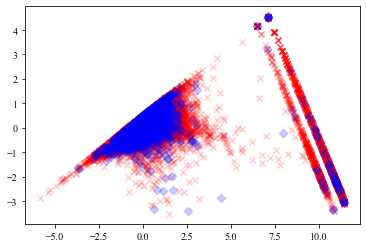

In [5]:
train_without_na=train_data1.dropna()
train_without_na.reset_index(drop=True, inplace=True)
bad_credit_x,bad_credit_y=[],[]
good_credit_x,good_credit_y=[],[]
for i in range(len(train_without_na['Default'])):
    if train_without_na.at[i,'Default']==0:
        good_credit_x.append(newX[i][0])
        good_credit_y.append(newX[i][1])
    elif train_without_na.at[i,'Default']==1:
        bad_credit_x.append(newX[i][0])
        bad_credit_y.append(newX[i][1])
with HiddenPrints():
    plt.scatter(good_credit_x,good_credit_y,c='r',marker='x',alpha=0.2)
    plt.scatter(bad_credit_x,bad_credit_y,c='b',marker='D',alpha=0.2)